Importamos Librerias

In [41]:
import pandas as pd
import numpy as np
import re
import seaborn as sns

Importo Data Set

In [2]:
data = pd.read_csv("../Desktop/properati.csv", sep=",")

FileNotFoundError: [Errno 2] File ../Desktop/properati.csv does not exist: '../Desktop/properati.csv'

Miro el tipo de columnas, y los primeros elementos

In [4]:
print (data.dtypes)
data.head(10)

Unnamed: 0                      int64
operation                      object
property_type                  object
place_name                     object
place_with_parent_names        object
country_name                   object
state_name                     object
geonames_id                   float64
lat-lon                        object
lat                           float64
lon                           float64
price                         float64
currency                       object
price_aprox_local_currency    float64
price_aprox_usd               float64
surface_total_in_m2           float64
surface_covered_in_m2         float64
price_usd_per_m2              float64
price_per_m2                  float64
floor                         float64
rooms                         float64
expenses                      float64
properati_url                  object
description                    object
title                          object
image_thumbnail                object
dtype: objec

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
0,0,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6618237,-58.5088387",-34.661824,...,40.0,1127.272727,1550.000000,NaN,NaN,NaN,http://www.properati.com.ar/15bo8_venta_ph_mat...,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,https://thumbs4.properati.com/8/BluUYiHJLhgIIK...
1,1,sell,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Argentina,Bs.As. G.B.A. Zona Sur,3432039.0,"-34.9038831,-57.9643295",-34.903883,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15bob_venta_depart...,Venta de departamento en décimo piso al frente...,VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37 ...,https://thumbs4.properati.com/7/ikpVBu2ztHA7jv...
2,2,sell,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6522615,-58.5229825",-34.652262,...,55.0,1309.090909,1309.090909,NaN,NaN,NaN,http://www.properati.com.ar/15bod_venta_depart...,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,https://thumbs4.properati.com/5/SXKr34F_IwG3W_...
3,3,sell,PH,Liniers,|Argentina|Capital Federal|Liniers|,Argentina,Capital Federal,3431333.0,"-34.6477969,-58.5164244",-34.647797,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15boh_venta_ph_lin...,PH 3 ambientes con patio. Hay 3 deptos en lote...,PH 3 amb. cfte. reciclado,https://thumbs4.properati.com/3/DgIfX-85Mog5SP...
4,4,sell,apartment,Centro,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Argentina,Buenos Aires Costa Atlántica,3435548.0,"-38.0026256,-57.5494468",-38.002626,...,35.0,1828.571429,1828.571429,NaN,NaN,NaN,http://www.properati.com.ar/15bok_venta_depart...,DEPARTAMENTO CON FANTÁSTICA ILUMINACIÓN NATURA...,DEPTO 2 AMB AL CONTRAFRENTE ZONA CENTRO/PLAZA ...,https://thumbs4.properati.com/5/xrRqlNcSI_vs-f...
5,5,sell,house,Gualeguaychú,|Argentina|Entre Ríos|Gualeguaychú|,Argentina,Entre Ríos,3433657.0,"-33.0140714,-58.519828",-33.014071,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15bop_venta_depart...,"Casa en el perímetro del barrio 338, ubicada e...","Casa Barrio 338. Sobre calle 3 de caballería, ...",https://thumbs4.properati.com/6/q-w68gvaUEQVXI...
6,6,sell,PH,Munro,|Argentina|Bs.As. G.B.A. Zona Norte|Vicente Ló...,Argentina,Bs.As. G.B.A. Zona Norte,3430511.0,"-34.5329567,-58.5217825",-34.532957,...,78.0,1226.415094,1666.666667,NaN,NaN,NaN,http://www.properati.com.ar/15bor_venta_ph_mun...,MUY BUEN PH AL FRENTE CON ENTRADA INDEPENDIENT...,"MUY BUEN PH AL FRENTE DOS DORMITORIOS , PATIO,...",https://thumbs4.properati.com/5/6GOXsHCyDu1aGx...
7,7,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.5598729,-58.443362",-34.559873,...,40.0,3066.666667,3450.000000,NaN,NaN,NaN,http://www.properati.com.ar/15bot_venta_depart...,EXCELENTE MONOAMBIENTE A ESTRENAR AMPLIO SUPER...,JOSE HERNANDEZ 1400 MONOAMBIENTE ESTRENAR CAT...,https://thumbs4.properati.com/1/IHxARynlr8sPEW...
8,8,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.5598729,-58.443362",-34.559873,...,60.0,3000.000000,3250.000000,NaN,NaN,NaN,http://www.properati.com.ar/15bou_venta_depart...,EXCELENTE DOS AMBIENTES ESTRENAR AMPLIO SUPER...,"JOSE HERNANDEZ 1400 DOS AMBIENTES ESTRENAR ,...",https://thumbs4.properati.com/2/J3zOjgaFHrkvnv...
9,9,sell,house,Rosario,|Argentina|Santa Fe|Rosario|,Argentina,Santa Fe,3838574.0,"-32.942031,-60.7259192",-32.942031,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15box_venta_casa_r...,MEDNOZA AL 7600A UNA CUADRA DE CALLE MENDOZAWH...,WHITE 7637 - 2 DORMITORIOS CON PATIO,https://thumbs4.properati.com/8/RCf1YEWdF4rv98...


Veo variables operation, y country_name (tienen un unico valor)

In [5]:
print(data.operation.value_counts())
print(data.property_type.value_counts())

sell    121220
Name: operation, dtype: int64
apartment    71065
house        40268
PH            5751
store         4136
Name: property_type, dtype: int64


Veo variable state_name

In [6]:
print(data.state_name.value_counts())

Capital Federal                 32316
Bs.As. G.B.A. Zona Norte        25560
Bs.As. G.B.A. Zona Sur          13952
Córdoba                         12069
Santa Fe                        10172
Buenos Aires Costa Atlántica    10006
Bs.As. G.B.A. Zona Oeste         9322
Buenos Aires Interior            2291
Río Negro                         808
Neuquén                           733
Mendoza                           681
Tucumán                           674
Corrientes                        583
Misiones                          464
Entre Ríos                        369
Salta                             278
Chubut                            259
San Luis                          252
La Pampa                          157
Formosa                            65
Chaco                              57
San Juan                           40
Tierra Del Fuego                   31
Catamarca                          27
Jujuy                              26
Santa Cruz                         20
La Rioja    

Reviso faltantes por columna

In [7]:
print(data.isnull().sum()/len(data)*100)

Unnamed: 0                     0.000000
operation                      0.000000
property_type                  0.000000
place_name                     0.018974
place_with_parent_names        0.000000
country_name                   0.000000
state_name                     0.000000
geonames_id                   15.440521
lat-lon                       42.525986
lat                           42.525986
lon                           42.525986
price                         16.837156
currency                      16.837981
price_aprox_local_currency    16.837156
price_aprox_usd               16.837156
surface_total_in_m2           32.443491
surface_covered_in_m2         16.422208
price_usd_per_m2              43.394654
price_per_m2                  27.686850
floor                         93.483749
rooms                         60.905791
expenses                      88.234615
properati_url                  0.000000
description                    0.001650
title                          0.000000


Traigo valor del dolar

In [8]:
mask = ((data['currency'] == 'ARS'))
valor_dolar = data.loc[mask,'price'] / data.loc[mask,'price_aprox_usd'] 
valor_dolar[valor_dolar.notnull()].mode()

0    17.830501
dtype: float64

Armo dataet final con las columnas de salida

In [9]:
datafinal = data.drop(['operation','place_with_parent_names','country_name','geonames_id','lat-lon','lat','lon','floor','expenses','properati_url','image_thumbnail'],axis = 1)

Completo las superficie totales faltantes

In [10]:
masksup = (datafinal['surface_covered_in_m2'].notnull()) & (datafinal['surface_total_in_m2'].isnull())
datafinal.loc[masksup,'surface_total_in_m2'] = datafinal.loc[masksup,'surface_covered_in_m2']

Veo los faltantes pre y post mascara

In [11]:
print(data['surface_total_in_m2'].isnull().sum())
print(datafinal['surface_total_in_m2'].isnull().sum())

39328
12369


Busco superficies en titulo y descripcion

In [12]:
#Buscamos los keywords que hagan alusión a los m2 de las propiedades dentro de la columna title, creamos una nueva columna
pattern1 = r'(\d*(,|\.\S*)\d|\d*)( |\d)(m2|M2|mts|MTS|metros|METROS|superficie|cubiertos|SUPERFICIE|CUBIERTO|CUBIERTA|cubierta)'
reg1 = re.compile(pattern1)

#Se aplica el patrón a la columna title y matchea los que lo cumplan, por lo que algún match equivaldría True, el resto False
title = datafinal.title.astype("str")

titulo_search = title.apply(lambda x: x if x is np.NaN else reg1.search(x))

titulo_not_null = titulo_search.notnull()

datafinal.loc[titulo_not_null,'Metros Titulo'] = titulo_search[titulo_not_null].apply(lambda x: x.group(0))

to_replace = [' cubierta',' metros',' superficie','icubierta',' CUBIERTA','scubierta',' METROS',', superficie',' CUBIERTO',' mts',' SUPERFICIE', ' m2',' cubiertos',' MTS','SCUBIERTA','OMETROS','scubiertos','icubiertos','ICUBIERTO','ICUBIERTA','.SUPERFICIE','-CUBIERTA','SCUBIERTO','Icubierta']
datafinal['Metros Titulo'] = datafinal['Metros Titulo'].replace(to_replace,np.NaN)


In [13]:
pattern = r'(\d{1,4}(\.|\,|)\d*)'
reg3 = re.compile(pattern)

mts_tit = datafinal['Metros Titulo'].apply(str)
mts_search = mts_tit.apply(lambda x: x if x is np.NaN else reg3.search(x))

mts_not_null = mts_search.notnull()
datafinal.loc[titulo_not_null,'Metros Titulo Final'] = mts_search[mts_not_null].apply(lambda x: x.group(0))

In [14]:
datafinal['Metros Titulo Final'] = datafinal['Metros Titulo Final'].str.split(',').str[0]
mask_total = (datafinal['surface_total_in_m2'].isnull()) & (datafinal['Metros Titulo Final'].notnull())
datafinal.loc[mask_total,'surface_total_in_m2'] = datafinal.loc[mask_total,'Metros Titulo Final']
mask_total.sum()

144

In [15]:
#Buscamos los keywords que hagan alusión a los m2 de las propiedades dentro de la columna title, creamos una nueva columna
pattern1 = r'(\d*(,|\.\S*)\d|\d*)( |\d)(m2|M2|mts|MTS|metros|METROS|superficie|cubiertos|SUPERFICIE|CUBIERTO|CUBIERTA|cubierta)'
reg1 = re.compile(pattern1)

#Se aplica el patrón a la columna title y matchea los que lo cumplan, por lo que algún match equivaldría True, el resto False
description = datafinal.description.astype("str")

description_search = description.apply(lambda x: x if x is np.NaN else reg1.search(x))

description_not_null = description_search.notnull()

datafinal.loc[description_not_null,'Metros description'] = description_search[description_not_null].apply(lambda x: x.group(0))

to_replace = [' cubierta',' metros',' superficie','icubierta',' CUBIERTA','scubierta',' METROS',', superficie',' CUBIERTO',' mts',' SUPERFICIE', ' m2',' cubiertos',' MTS','SCUBIERTA','OMETROS','scubiertos','icubiertos','ICUBIERTO','ICUBIERTA','.SUPERFICIE','-CUBIERTA','SCUBIERTO','Icubierta']
datafinal['Metros description'] = datafinal['Metros description'].replace(to_replace,np.NaN)

In [16]:
pattern = r'(\d{1,4}(\.|\,|)\d*)'
reg3 = re.compile(pattern)

mts_description = datafinal['Metros description'].apply(str)
mts_search = mts_description.apply(lambda x: x if x is np.NaN else reg3.search(x))

mts_not_null = mts_search.notnull()
datafinal.loc[description_not_null,'Metros description Final'] = mts_search[mts_not_null].apply(lambda x: x.group(0))

In [17]:
datafinal['Metros description Final'] = datafinal['Metros description Final'].str.split(',').str[0]
mask_total = (datafinal['surface_total_in_m2'].isnull()) & (datafinal['Metros description Final'].notnull())
datafinal.loc[mask_total,'surface_total_in_m2'] = datafinal.loc[mask_total,'Metros description Final']

mask_total.sum()

2805

Completo los que tienen precio en price y currency USD

In [18]:
mask = (datafinal['price_usd_per_m2'].isnull()) & (data['price_per_m2'].notnull() & (data['currency'] == 'USD'))
datafinal.loc[mask,'price_usd_per_m2'] = datafinal.loc[mask,'price_per_m2']

Veo pre y post

In [19]:
print(data['price_usd_per_m2'].isnull().sum())
print(datafinal['price_usd_per_m2'].isnull().sum())

52603
31166


Completo los que tienen precio en price y currency ARS

In [20]:
mask = (datafinal['price_usd_per_m2'].isnull()) & (data['price_per_m2'].notnull() & (data['currency'] == 'ARS'))
datafinal.loc[mask,'price_usd_per_m2'] = datafinal.loc[mask,'price_per_m2']*17.83

Veo pre y post

In [21]:
mask.value_counts()

False    118349
True       2871
dtype: int64

In [22]:
mask = (datafinal['price'].notnull()) & (datafinal['surface_total_in_m2'].notnull()) & (datafinal['price_usd_per_m2'].isnull())

datafinal.loc[mask,'price_usd_per_m2'] = datafinal.loc[mask,'price'] / datafinal.loc[mask,'surface_total_in_m2'].apply(float)

In [23]:
'''mask = (datafinal['price_usd_per_m2'].isnull()) & (datafinal['price_per_m2'].notnull())'''

'''datafinal.loc[mask,'price_usd_per_m2'] = datafinal.loc[mask,'price_per_m2']'''

"datafinal.loc[mask,'price_usd_per_m2'] = datafinal.loc[mask,'price_per_m2']"

Veo cuantos remplaze

In [24]:
mask.value_counts()

False    119453
True       1767
dtype: int64

Veo cuantos valores missing corregi en price per m2

In [25]:
print(data.price_usd_per_m2.isnull().sum()/len(data.price_usd_per_m2)*100)
print(datafinal.price_usd_per_m2.isnull().sum()/len(datafinal.price_usd_per_m2)*100)

43.394654347467416
21.88417752846065


Evaluo columna de precio por m2 por estado para ver que distribucion tiene

In [26]:
bines = pd.qcut(datafinal['price_usd_per_m2'],10)
bines.name = 'Bin'
DataBines = pd.concat([datafinal,bines],axis=1, )


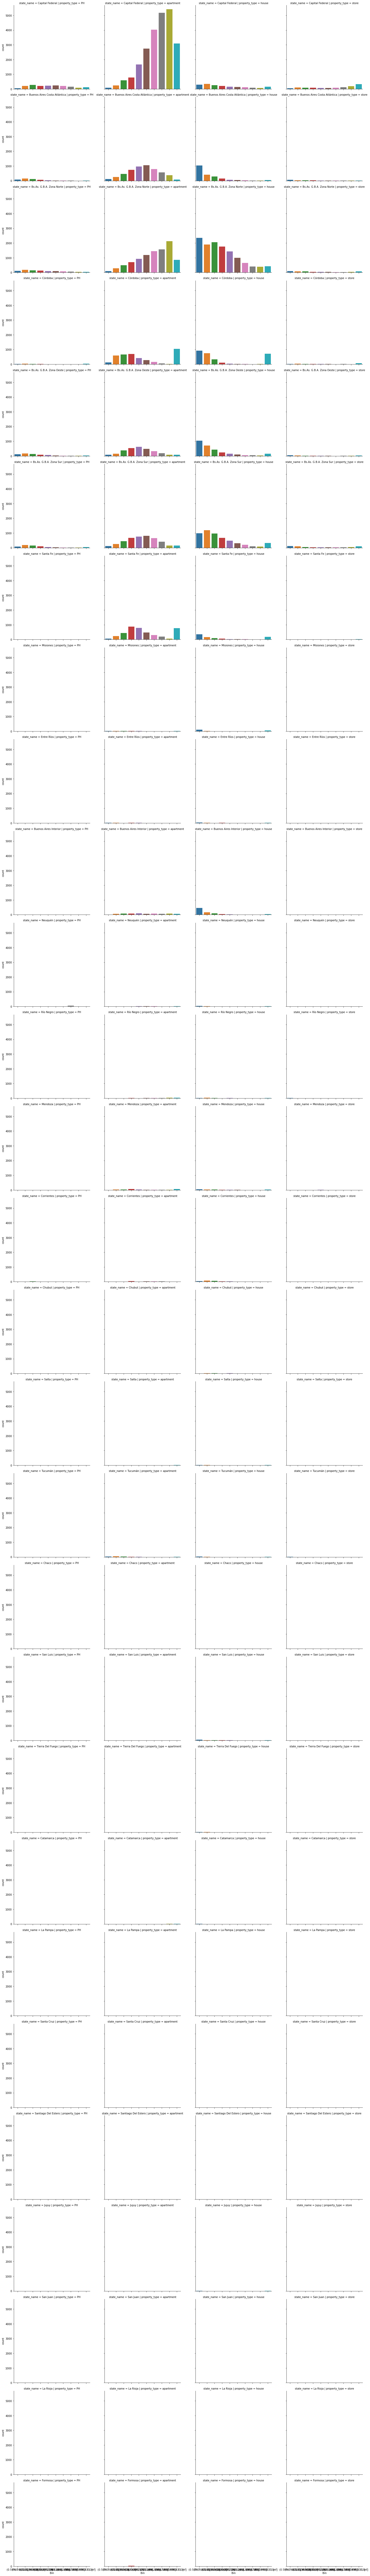

In [27]:
g = sns.catplot(x='Bin', row="state_name", col= 'property_type',
                data=DataBines[DataBines.price_usd_per_m2.notnull()],
                kind="count")

La variable precio m2 no mantiene una distribucion por lo que no nos parece correcto hacer un remplazo de los valores faltantes

Miro outliers:

<AxesSubplot:xlabel='price_usd_per_m2'>

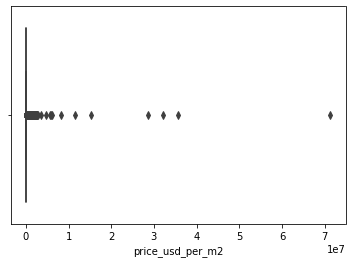

In [28]:
sns.boxplot(x=datafinal['price_usd_per_m2'])

<AxesSubplot:xlabel='price'>

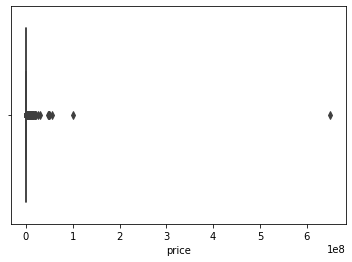

In [29]:
sns.boxplot(x=datafinal['price'])

Armo 10 bines y borro el extremo

In [30]:
df_ph = datafinal['price_usd_per_m2']
lab = [1,2,3,4,5,6,7,8,9,10]
ps_cat, ps_decilos = pd.qcut(datafinal['price_usd_per_m2'],10,labels=lab,retbins=True)
ps_cat.value_counts()

4     6346
2     6341
13    6338
12    6327
8     6323
10    6314
15    6313
7     6313
1     6313
11    6312
6     6309
9     6302
3     6288
5     6280
14    6273
Name: price_usd_per_m2, dtype: int64

In [31]:
ps_cat.name = 'ps_cat'
df_ph_scat = pd.concat([datafinal,ps_cat],axis=1, )

ps_cat_mask = df_ph_scat['ps_cat'] == 10

df_ph_scat.drop(df_ph_scat[ps_cat_mask].index,inplace=True)

datafinal = df_ph_scat


Miro nuevamente el grafico de cajas sin outliers

<AxesSubplot:xlabel='price_usd_per_m2'>

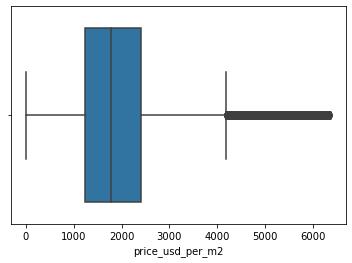

In [32]:
sns.boxplot(x=datafinal['price_usd_per_m2'])

Miro cuantos missings me quedaron

In [ ]:
datafinal.price_usd_per_m2.notnull().value_counts()

Borro valores missings en precio m2 usd

In [33]:
mask = datafinal.price_usd_per_m2.notnull()

In [34]:
datafinal = datafinal.loc[mask]

In [35]:
datafinal

,Unnamed: 0,property_type,place_name,state_name,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,rooms,description,title,Metros Titulo,Metros Titulo Final,Metros description,Metros description Final,ps_cat
0,0,PH,Mataderos,Capital Federal,62000.0,USD,1093959.00,62000.0,55,40.0,1127.272727,1550.000000,NaN,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,NaN,NaN,NaN,NaN,3
2,2,apartment,Mataderos,Capital Federal,72000.0,USD,1270404.00,72000.0,55,55.0,1309.090909,1309.090909,NaN,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,NaN,NaN,NaN,NaN,4
4,4,apartment,Centro,Buenos Aires Costa Atlántica,64000.0,USD,1129248.00,64000.0,35,35.0,1828.571429,1828.571429,NaN,DEPARTAMENTO CON FANTÁSTICA ILUMINACIÓN NATURA...,DEPTO 2 AMB AL CONTRAFRENTE ZONA CENTRO/PLAZA ...,NaN,NaN,NaN,NaN,8
6,6,PH,Munro,Bs.As. G.B.A. Zona Norte,130000.0,USD,2293785.00,130000.0,106,78.0,1226.415094,1666.666667,NaN,MUY BUEN PH AL FRENTE CON ENTRADA INDEPENDIENT...,"MUY BUEN PH AL FRENTE DOS DORMITORIOS , PATIO,...",NaN,NaN,106 m2,106,4
7,7,apartment,Belgrano,Capital Federal,138000.0,USD,2434941.00,138000.0,45,40.0,3066.666667,3450.000000,NaN,EXCELENTE MONOAMBIENTE A ESTRENAR AMPLIO SUPER...,JOSE HERNANDEZ 1400 MONOAMBIENTE ESTRENAR CAT...,NaN,NaN,NaN,NaN,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121209,121209,apartment,Belgrano,Capital Federal,410000.0,USD,7234245.00,410000.0,157,NaN,2611.464968,NaN,NaN,Edificio en esquina de muy buena categoría de ...,Av .Luis Maria Campos 1400- Belgrano-Capital F...,NaN,NaN,NaN,NaN,12
121216,121216,house,Beccar,Bs.As. G.B.A. Zona Norte,498000.0,USD,8786961.00,498000.0,360,360.0,1383.333333,1383.333333,NaN,Excelente e impecable casa en Venta en Las Lom...,Ruca Inmuebles | Venta | Lomas de San Isidro |...,NaN,NaN,572 m2,572,5
121217,121217,apartment,Villa Urquiza,Capital Federal,131500.0,USD,2320251.75,131500.0,46,39.0,2858.695652,3371.794872,NaN,VENTA DEPARTAMENTO AMBIENTE DIVISIBLE A ESTREN...,VENTA DEPARTAMENTO AMBIENTE DIVISIBLE A ESTREN...,NaN,NaN,"43,00m2",43,13
121218,121218,apartment,Plaza Colón,Buenos Aires Costa Atlántica,95900.0,USD,1692107.55,95900.0,48,48.0,1997.916667,1997.916667,NaN,"2 Amb al contrafrente, luminoso. El departame...",2 amb. C/ dep. de servicio al contrafrente| Re...,NaN,NaN,NaN,NaN,9


Busco otras caracteristicas en la descripcion de las propiedades (Cochera, Parrilla, etc) 

In [57]:
pattern_cochera = "Cochera"
reg_cochera = re.compile(pattern_cochera)
descripcion = datafinal["description"].astype("str")
cochera_matches = descripcion.apply(lambda x: x if x is np.NaN else reg_cochera.search(x))
mascara_cochera = cochera_matches.notnull()
datafinal["cochera"] == 0
datafinal.loc[mascara_cochera, "cochera"] = 1

sin_cochera_pattern = "sin cochera"
reg_scochera = re.compile(sin_cochera_pattern)
sin_cochera_matches = descripcion.apply(lambda x: x if x is np.NaN else reg_scochera.search(x))
mascara_scochera = sin_cochera_matches.notnull()
datafinal["sin cochera"] == 0 
datafinal.loc[mascara_scochera, "sin cochera"] = 1

def cochera(x): 
    if x["cochera"] == 1 and x["sin cochera"] == 0: 
        return x["cochera"]
    if x["cochera"] == 1 and x["sin cochera"] == 1: 
        return x["sin cochera"]
    if x["cochera"] == 0 : 
        return x["cochera"]
    datafinal["cochera"] = datafinal.apply(cocheras, axis = 1)
    datafinal.drop(columns = "sin cochera", inplace = True)


In [63]:
datafinal.cochera.value_counts()

0    71490
1    16889
Name: cochera, dtype: int64

In [82]:
pileta_pattern = '(pileta|piscina|Pileta|Piscina)'
pileta_regex = re.compile(pileta_pattern)
pileta_matches = descripcion.apply(lambda x: x if x is np.NaN else pileta_regex.search(x))
mascara_pileta = pileta_matches.notnull()
datafinal["pileta"] == 0
datafinal.loc[mascara_pileta,"pileta"] = 1
# Busco si tiene pileta o no el numero uno representa la presencia de una parrilla mientras el numero 0 la ausencia de la misma 

In [92]:
parrilla_pattern = "(Parrilla|parrilla)"
parrilla_reg = re.compile(parrilla_pattern)
parrilla_matches = descripcion.apply(lambda x: x if x is np.NaN else parrilla_reg.search(x))
mascara_parrilla = parrilla_matches.notnull()
datafinal["parrilla"] == 0 
datafinal.loc[mascara_parrilla,"parrilla"] = 1

In [97]:
gimnasio_pattern = "(GYM|Gimnasio|gym|gimnasio)"
gimnasio_reg = re.compile(gimnasio_pattern)
gimnasio_matches = descripcion.apply(lambda x: x if x is np.NaN else gimnasio_reg.search(x))
mascara_gimnasio = gimnasio_matches.notnull()
datafinal["GYM"] == 0 
datafinal.loc[mascara_gimnasio, "GYM"] = 1 

In [103]:
Sum_pattern = "(Sum|sum)"
sum_reg = re.compile(Sum_pattern)
sum_matches = descripcion.apply(lambda x: x if x is np.NaN else sum_reg.search(x))
mascara_sum = sum_matches.notnull()
datafinal["Sum"] == 0 
datafinal.loc[mascara_sum, "Sum"] = 1 

In [104]:
datafinal.Sum.value_counts()

0    83017
1     5362
Name: Sum, dtype: int64

In [ ]:
scat = data.plot(kind='scatter',
                  x='surface_total_in_m2', y='price_aprox_usd',
                  alpha = 0.33, color = 'blue',
                  figsize=(8, 8))
scat.set_xlabel('Superficie total m2')
scat.set_ylabel('Precio en USD')
scat.set_title('Total m2 vs Precio USD',
             fontsize=16, weight="bold")

In [ ]:
scat = data.plot(kind='scatter',
                  x='surface_total_in_m2', y='price_aprox_local_currency',
                  alpha = 0.33, color = 'blue',
                  figsize=(8, 8))
scat.set_xlabel('Sueprficie total m2')
scat.set_ylabel('Precio en ARS')
scat.set_title('Total m2 vs Precio ARS',
             fontsize=16, weight="bold")

In [ ]:
scat = data.plot(kind='scatter',
                  x='surface_covered_in_m2', y='price_aprox_usd',
                  alpha = 0.33, color = 'blue',
                  figsize=(8, 8))
scat.set_xlabel('Superficie cubierta m2')
scat.set_ylabel('Precio en USD')
scat.set_title('Cubierto m2 vs Precio USD',
             fontsize=16, weight="bold")

In [ ]:
scat = data.plot(kind='scatter',
                  x='surface_covered_in_m2', y='price_aprox_local_currency',
                  alpha = 0.33, color = 'blue',
                  figsize=(8, 8))
scat.set_xlabel('Superficie cubierta m2')
scat.set_ylabel('Precio en ARS')
scat.set_title('Cubierto m2 vs Precio ARS',
             fontsize=16, weight="bold")

In [ ]:
scat = data.plot(kind='scatter',
                  x='rooms', y='price_aprox_usd',
                  alpha = 0.33, color = 'green',
                  figsize=(8, 8))
scat.set_xlabel('Ambientes')
scat.set_ylabel('Precio en USD')
scat.set_title('Ambientes Vs Precio en USD',
             fontsize=16, weight="bold")

In [ ]:
sns.pairplot(data, vars=["surface_total_in_m2", "price_usd_per_m2" ], hue = 'property_type', diag_kind = 'kde');

# relacion superficie total en m2 y precio en usd x m2 para los distintos tipos de propiedad. 

In [ ]:
sns.pairplot(data, vars=["rooms", "price_usd_per_m2" ], hue = 'property_type', diag_kind = 'kde');

# relacion cantidad de ambientes y precio en usd x m2 para los distintos tipos de propiedad. 

In [ ]:
with sns.axes_style(style='ticks'):
    g = sns.catplot("property_type", "price_usd_per_m2", data=data, kind="box")
    g.set_axis_labels("Property Type", "Price USD per m2");
    
# precio en usd x m2 por los distintos tipos de propiedad.     

In [ ]:
with sns.axes_style(style='ticks'):
    g = sns.catplot("property_type", "price_aprox_usd", data=data, kind="box")
    g.set_axis_labels("Property Type", "Price Aprox USD");
    
# precio en usd por los distintos tipos de propiedad. (A ver si se ve una diferencia con usd x m2)      

In [ ]:
sns.violinplot("price_aprox_usd", "state_name", hue="property_type", data=data,
                   split=False, inner="quartile",
                   palette=["red", "blue"]);

# Graficamos la distribución del precio en usd según "state" y el tipo de propiedad. 